In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
import numpy as np

import plotly.graph_objs as go
from plotly.offline import iplot

# Emoji to strip emoji
import emoji #pip install emoji

# Data Import and Display

In [2]:
# Panda set max col width to none, so that all the text can be display
pd.set_option('display.max_colwidth', None)

df = pd.read_csv("cyberbullying_tweets.csv")
#df.style.set_properties(**{'text-align': 'right'}) # Align all text in columns to left
df.head(10)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,@gcarothers eek. i can't stand split keyboards. doesn't work well with MMOs.,not_cyberbullying
2,"@GlennF @Spacekatgal it is rather funny how all of us are so completely different, yet complement each other's skill sets so well.",not_cyberbullying
3,@jukes303 The old oil cliche again. The US pays for every drop of oil they get from the ME on the open market just like every other country.,not_cyberbullying
4,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying
5,@onebrightlight i've been talking to 2 employees and i heard about a lot of the internal politics re: GG. it's enough to make me stay.,not_cyberbullying
6,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
7,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying
8,"@Raja5aab @Quickieleaks Yes, the test of god is that good or bad or indifferent or weird or whatever, it all proves gods existence.",not_cyberbullying
9,Karma. I hope it bites Kat on the butt. She is just nasty. #mkr,not_cyberbullying


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47693 entries, 0 to 47692
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47693 non-null  object
 1   cyberbullying_type  47693 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


## Text Data Preprocessing For Data Exploration
### In this data exploration section,  I am going to
1. First, do some basic text cleaning using lowercase, regular expression and stopword.  
2. Ultilize the powerful word cloud to visualize most appeared word both in all classes.  
3. Getting highest frequency of unigram and bigram of each class use plot a graph.

In [4]:
# Regular Expression pattern of text cleaning pattern
# This REGEX pattern remove any @tagname from tweet, remove #hashtag !@#$%^&*: etc., remove website name like https:///www.fb.com
# But will remain all the A-Z a-z 0-9 character
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# pip install wordcloud
# import word cloud to produce wordcloud on cleaned twitter text for data exploration
from wordcloud import STOPWORDS
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 's'])

# Function To preprocess the twitter text

# Lowercase all text
def lower(text):
    return text.lower()

# To clean the tweet with REGEX above
def clean_tweet_re(text):
    return re.sub(TEXT_CLEANING_RE, ' ', text)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


In [5]:
# Create a copy of df for visualization
df_visual = df.copy()

df_visual['tweet_text'] = df_visual['tweet_text'].apply(lower)
df_visual['tweet_text'] = df_visual['tweet_text'].apply(clean_tweet_re)
df_visual['tweet_text'] = df_visual['tweet_text'].apply(remove_stopwords)


# Color Class for python printing, Making print more easy to read
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Comparing Ori Tweet Text vs cleaned Tweet Text, Original black bold color vs Clean green bold color
for i in range(0, 10):
    original_text = df['tweet_text'].head(10)[i]
    cleaned_text = df_visual['tweet_text'].head(10)[i]
    comparision = f'{color.BOLD} {i}) {original_text} ==>> {color.GREEN} {color.BOLD} {cleaned_text} {color.END}\n'
    print(comparision)

 0) In other words #katandandre, your food was crapilicious! #mkr ==>>   words katandandre food crapilicious 

 1) @gcarothers eek. i can't stand split keyboards. doesn't work well with MMOs. ==>>   eek stand split keyboards doesn work well mmos 

 2) @GlennF @Spacekatgal it is rather funny how all of us are so completely different, yet complement each other's skill sets so well. ==>>   spacekatgal rather funny us completely different yet complement skill sets well 

 3) @jukes303 The old oil cliche again. The US pays for every drop of oil they get from the ME on the open market just like every other country. ==>>   old oil cliche us pays every drop oil open market every country 

 4) Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc ==>>   aussietv white theblock imacelebrityau today sunrise studio10 neighbours wonderlandten etc 

 5) @onebrightlight i've been talking to 2 employees and i heard about a lot of the intern

In [6]:
# Create this function to get the highest count of unigram and bigrams

def get_highest_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = STOPWORDS).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Data Exploration
In this data exploration section, I am going to explore the most used word with wordcloud and bar plot table for each Class (Not Bullying, Gender, Etc)

## Not Bullying Class Word Exploration

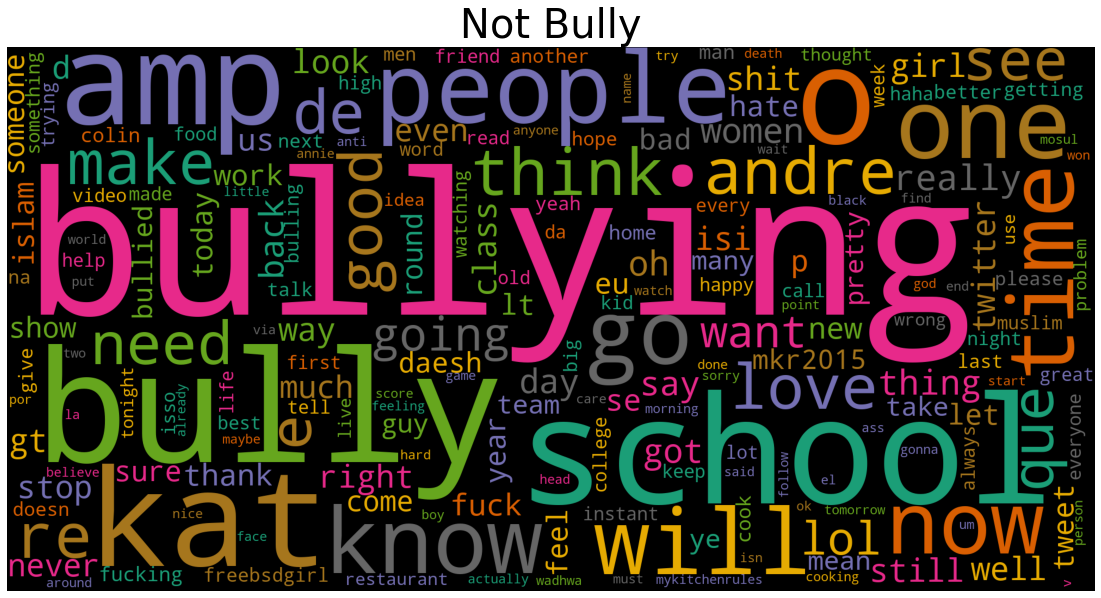

In [7]:
# Import word cloud to visualize highest count word with cloud display effect
from wordcloud import WordCloud

plt.figure(figsize=(20, 10)) #Setting figure size to better width
subset_notbully = df_visual[df_visual['cyberbullying_type'] == 'not_cyberbullying']
text_notbully = subset_notbully.tweet_text.values
cloud_notbully = WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_notbully))

plt.axis('off')
plt.title("Not Bully", fontsize=40)
plt.imshow(cloud_notbully)

In [8]:
# Pandas Series object do not have a iplot function
# This code is to use cufflinks to link plotly to pandas and add iplot used at below

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [9]:
# Get the unigrams, single word that appear most 
unigrams_notbully = get_highest_gram(text_notbully,(1,1),10)

# Get the bigrams, two word that appear most
bigrams_notbully = get_highest_gram(text_notbully,(2,2),10)

notbully_1 = pd.DataFrame(unigrams_notbully, columns = ['Text' , 'count'])
notbully_1.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(kind='bar', yTitle='Count', linecolor='black',color='black', title='Top 10 Unigrams',orientation='h')

notbully_2 = pd.DataFrame(bigrams_notbully, columns = ['Text' , 'count'])
notbully_2.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(kind='bar', yTitle='Count', linecolor='black',color='black', title='Top 10 Bigrams',orientation='h')

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'let', 'mustn', 're', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



## Gender Class Word Exploration

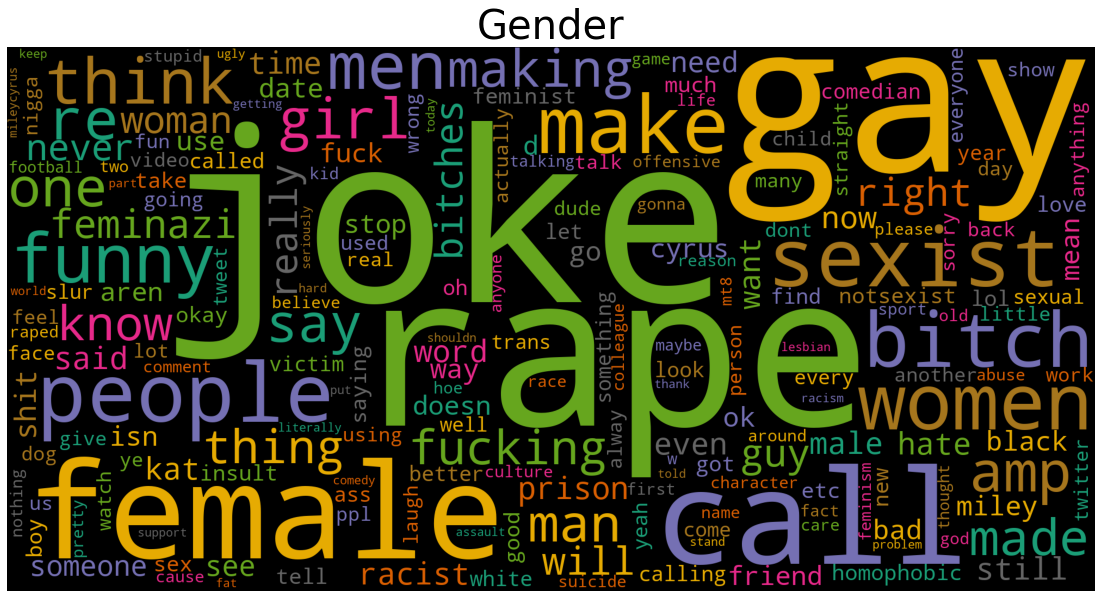

In [10]:
plt.figure(figsize=(20,10)) 
subset1 = df_visual[df_visual['cyberbullying_type'] == 'gender']
text_gender = subset1.tweet_text.values
cloud1=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_gender))

plt.axis('off')
plt.title("Gender",fontsize=40)
plt.imshow(cloud1)

In [11]:
# Get the unigrams, single word that appear most 
unigrams_gender = get_highest_gram(text_gender,(1,1),10)

# Get the bigrams, two word that appear most
bigrams_gender = get_highest_gram(text_gender,(2,2),10)

gender_1 = pd.DataFrame(unigrams_gender, columns = ['Text' , 'count'])
gender_1.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(kind='bar', yTitle='Count', linecolor='black',color='black', title='Top 10 Unigrams',orientation='h')

gender_2 = pd.DataFrame(bigrams_gender, columns = ['Text' , 'count'])
gender_2.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(kind='bar', yTitle='Count', linecolor='black',color='black', title='Top 10 Bigrams',orientation='h')

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'let', 'mustn', 're', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



## Age Bully Class Word Exploration

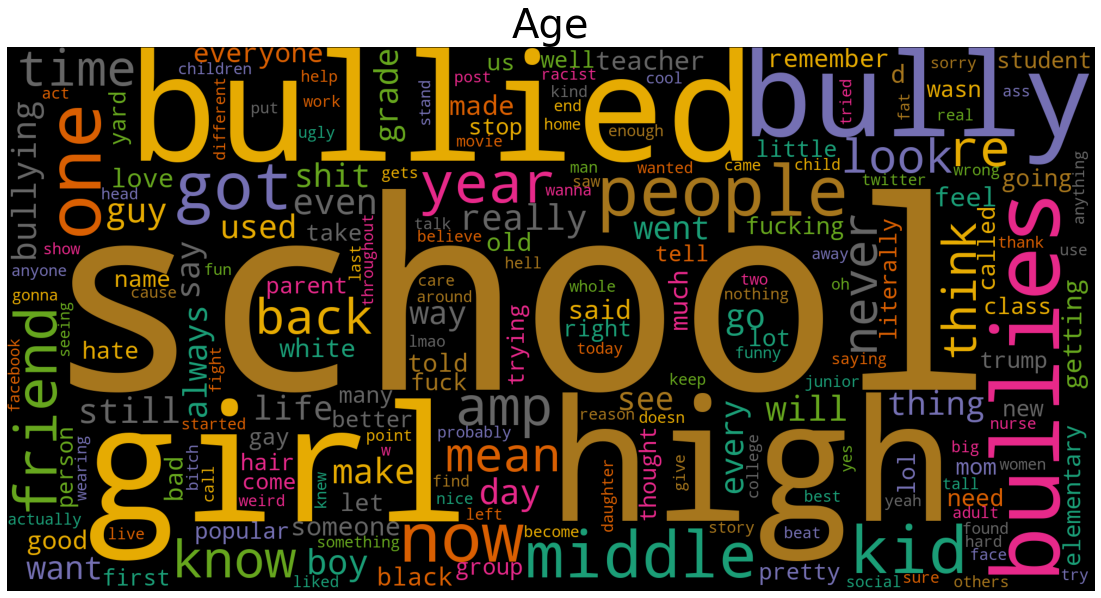

In [12]:
plt.figure(figsize=(20,10)) #Setting figure size to better width

subset_age = df_visual[df_visual['cyberbullying_type']=='age']
text_age = subset_age.tweet_text.values
cloud1=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_age))

plt.axis('off')
plt.title("Age",fontsize=40)
plt.imshow(cloud1)

In [13]:
# Get the unigrams, single word that appear most 
unigrams_age = get_highest_gram(text_age,(1,1),10)

# Get the bigrams, two word that appear most
bigrams_age = get_highest_gram(text_age,(2,2),10)

age_1 = pd.DataFrame(unigrams_age, columns = ['Text' , 'count'])
age_1.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(kind='bar', yTitle='Count', linecolor='black',color='black', title='Top 10 Unigrams',orientation='h')

age_2 = pd.DataFrame(bigrams_age, columns = ['Text' , 'count'])
age_2.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(kind='bar', yTitle='Count', linecolor='black',color='black', title='Top 10 Bigrams',orientation='h')

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'let', 'mustn', 're', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



# Data Preprocessing For Train In Deep Learning model
Note that the Data Frame `df_visual` is preprocessed (using different method) and are meant to use in word cloud data exploration only. Now I will switch back to main Data Frame `df` to do different preprocessing that will be used to fit into Deep Learning Model to train for the cyberbullying classification problems.

In [14]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,@gcarothers eek. i can't stand split keyboards. doesn't work well with MMOs.,not_cyberbullying
2,"@GlennF @Spacekatgal it is rather funny how all of us are so completely different, yet complement each other's skill sets so well.",not_cyberbullying
3,@jukes303 The old oil cliche again. The US pays for every drop of oil they get from the ME on the open market just like every other country.,not_cyberbullying
4,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47693 entries, 0 to 47692
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47693 non-null  object
 1   cyberbullying_type  47693 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [16]:
# Rename columns into shorter words for easier references
df = df.rename(columns={'tweet_text': 'text', 'cyberbullying_type': 'bully_type'})

In [17]:
# df.duplicated function will take the row that have excalty same value across all columns as true
df.duplicated().sum()

46

In [18]:
# This line will drop the duplicated 46 rows
df = df[~df.duplicated()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47647 entries, 0 to 47692
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        47647 non-null  object
 1   bully_type  47647 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB



After dropping the 46 duplicated rows, the total rows had turn from `47693` to `47647`

In [19]:
# Now we want to check if the data class is balance
df['bully_type'].value_counts()

religion               7997
age                    7990
ethnicity              7959
gender                 7945
not_cyberbullying      7935
other_cyberbullying    7821
Name: bully_type, dtype: int64

The classes seem balanced

## Apply Deep Cleaning - Tweet Text
### In this deep cleaning, we going to apply:
* Strip emoji
* Strip all entities
* Decontract

*This Deep Cleaning is more comprehensive than previous one, because previous was meant for data exploration, while the complex one are necessary for our LSTM model to learn more efficient and effectively.

In [20]:
#Import all the library for deep cleansing
import re, string
import emoji #!pip install emoji
import nltk #!pip install nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
##CUSTOM DEFINED FUNCTIONS TO CLEAN THE TWEETS

# Remove all emojis from text, since it is a twitter it might include some amount of emojis
def strip_emoji(text):
    return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji

#Remove punctuations, links, stopwords, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    text =' '.join(word for word in text.split() if len(word) < 14) # remove words longer than 14 characters
    return text

#remove contractions
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the "#" symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as "&" and "$" present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

#Remove multiple sequential spaces
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

#Stemming
def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

#Lemmatization 
#NOTE:Stemming seems to work better for this dataset
def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

#Then we apply all the defined functions in the following order
def deep_clean(text):
    text = strip_emoji(text)
    text = decontract(text)
    text = strip_all_entities(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    text = stemmer(text)
    return text

In [22]:
new_texts = []
for each_text in df['text']:
    new_texts.append(deep_clean(each_text))

C:\Users\Admin\AppData\Local\Temp\ipykernel_17720\3236355396.py:5: DeprecationWarning:

'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'



Now we will add `df` Data Frame with a new columns called `new_text`, using deep cleaned text

In [23]:
df['clean_text'] = new_texts

In [24]:
df.head()

,text,bully_type,clean_text
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,word katandandr food crapilici mkr
1,@gcarothers eek. i can't stand split keyboards. doesn't work well with MMOs.,not_cyberbullying,eek stand split keyboard work well mmo
2,"@GlennF @Spacekatgal it is rather funny how all of us are so completely different, yet complement each other's skill sets so well.",not_cyberbullying,rather funni us complet differ yet complement skill set well
3,@jukes303 The old oil cliche again. The US pays for every drop of oil they get from the ME on the open market just like every other country.,not_cyberbullying,old oil clich us pay everi drop oil get open market like everi countri
4,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying,aussietv white mkr theblock today sunris studio10 neighbour wonderlandten etc


In [25]:
df.tail()

,text,bully_type,clean_text
47688,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will be wasting it for building the future.",ethnicity,black ppl expect anyth depend anyth yet free particip work enjoy freedom human across globe wast energi past wast build futur
47689,Turner did not withhold his disappointment. Turner called the court an “abominable conclave of negro hating demons” (with one exception) who “issued another decree that colored men and women must be driven into Jim Crow cars whenever it suits the whim of any white community.”,ethnicity,turner withhold turner call court abomin conclav negro hate demon one except issu anoth decre color men women must driven jim crow car whenev suit whim white commun
47690,I swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&lt; FUCK.,ethnicity,swear god dumb nigger bitch got bleach hair reeeeeal fuckin soon dlt fuck
47691,"Yea fuck you RT @therealexel: IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS.",ethnicity,yea fuck rt your nigger fuck unfollow fuck dumb nigger
47692,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK KP that dumb nigger bitch lmao,ethnicity,bro u got ta chill rt dog fuck kp dumb nigger bitch lmao


In [26]:
# Ultilize string interpolate to print information more clearly with label
print(f'Shape: {df.shape}')
sum_duplicate = df["clean_text"].duplicated().sum()
print(f'Duplicated Sum: {sum_duplicate}')

Shape: (47647, 3)
Duplicated Sum: 3061


In [27]:
df.drop_duplicates("clean_text", inplace=True) # Apply Inplace = True to actually apply into the df

In [28]:
df.shape

(44586, 3)

In [29]:
# Recheck Class Balance
df['bully_type'].value_counts()

religion               7945
age                    7881
ethnicity              7743
not_cyberbullying      7635
gender                 7604
other_cyberbullying    5778
Name: bully_type, dtype: int64

As we can see, most of the dropped duplicated instance are from `other_cyberbullying` class, which make the class drop to `5,778` compare to other `7,xxx`

In [30]:
df = df[df["bully_type"]!="other_cyberbullying"]
#classes = ["religion","age","ethnicity","gender","not bullying"]

### Tweet Text Length Analysis
Now we will create a new column called `text_length` in `df`, calculating the word length and input in it, so it is more easy to view and do plotting

In [31]:
text_length = []
for each_text in df['clean_text']:
    each_length = len(each_text.split())
    text_length.append(each_length)

In [32]:
# Apply the text length list array into data frame
df['text_length'] = text_length
df.head()

,text,bully_type,clean_text,text_length
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,word katandandr food crapilici mkr,5
1,@gcarothers eek. i can't stand split keyboards. doesn't work well with MMOs.,not_cyberbullying,eek stand split keyboard work well mmo,7
2,"@GlennF @Spacekatgal it is rather funny how all of us are so completely different, yet complement each other's skill sets so well.",not_cyberbullying,rather funni us complet differ yet complement skill set well,10
3,@jukes303 The old oil cliche again. The US pays for every drop of oil they get from the ME on the open market just like every other country.,not_cyberbullying,old oil clich us pay everi drop oil get open market like everi countri,14
4,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying,aussietv white mkr theblock today sunris studio10 neighbour wonderlandten etc,10


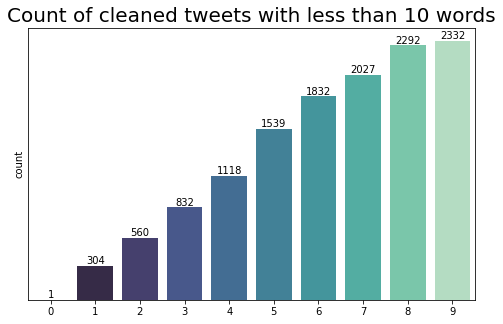

In [33]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='text_length', data=df[df['text_length']<10], palette='mako')
plt.title('Count of cleaned tweets with less than 10 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

If a tweets are too shorted, Deep Learning Model will not able to make sense of it, it will become the problematic outlier that will ruin the accuracy of the model while training and validationg.

We will remove tweets that are too short (less or equal than `3 words`).

In [34]:
df = df[df['text_length'] > 3]

We also need to check about tweet text that are too long, if a tweet had more than `100++` words that it is considered outlier that can affect the model too.

In [35]:
pd.set_option('display.max_colwidth', 100)
df.sort_values(by=['text_length'], ascending=False)

,text,bully_type,clean_text,text_length
44036,You so black and white trying to live like a nigger... Pahahahaha... Common is dumb as fuck!\r\n...,ethnicity,black white tri live like nigger pahahahaha common dumb fuck short huntsman dumb ass ya fuck gay...,187
45166,"@hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass nigger” this bitch &lt;~~This Whore SMH\r\nI don’t...",ethnicity,fuck obama dumb ass nigger bitch ltthi whore smh dont think either dont put anyth past nigga com...,162
1318,@EurekAlertAAAS: Researchers push to import top anti-bullying program to US schools http://t.co/...,not_cyberbullying,research push import top antibulli program us school instead person attack mayb explain 100 isla...,137
33725,"... I don't feel guilty for killing him, I just feel guilty because I enjoyed it. He tormented s...",age,feel guilti kill feel guilti enjoy torment sinc child even let bulli school harass almost cut ey...,137
47038,@Purely_Ambition: Sooo mad. RT @TracePeterson Fuck Obama that dumb nigger I'm going to Switzerla...,ethnicity,sooo mad rt fuck obama dumb nigger go switzerlan yooomaddddddd lmfaoo shut fuck dumb nigger sout...,125
...,...,...,...,...
33591,HIGH SCHOOL FCKIN BULLIES.,age,high school fckin bulli,4
5834,Just because we're not close anymore doesn't mean I don't care about you..,not_cyberbullying,close anymor mean care,4
5839,Isso é bullying com a cocota,not_cyberbullying,isso bulli com cocota,4
12440,RT @Rhys_Dempsey29 Where the women should be #notsexist #justfunny http://t.co/PdfuIvUyG8,gender,rt women notsexist justfunni,4


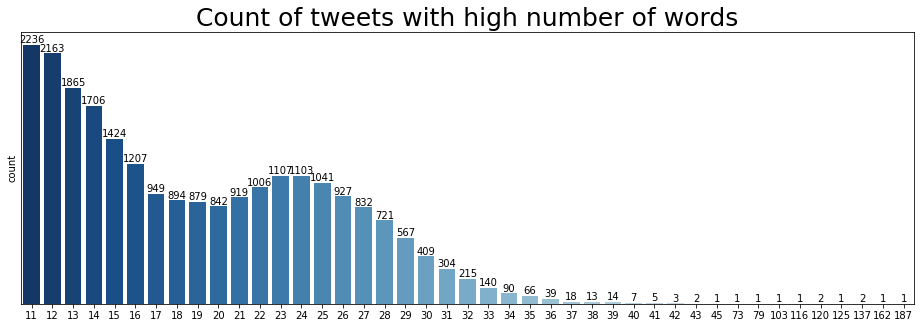

In [36]:
# Now we want to use countplot to plot the length size of the tweet text, length in between 10 to 1000

plt.figure(figsize=(16,5))
ax = sns.countplot(x='text_length', data=df[(df['text_length']<=1000) & (df['text_length']>10)], palette='Blues_r')
plt.title('Count of tweets with high number of words', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

As we can see from the graph, most tweets text length are from 11 to 30 which are good, decided to drop text length logner than 100.

In [37]:
df = df[df['text_length'] < 100]

In [38]:
max_length = np.max(df['text_length'])
max_length

79

In [39]:
df.sort_values(by=["text_length"], ascending=False)

,text,bully_type,clean_text,text_length
4847,@andrea_gcav: @viviaanajim recuerdas como nosotras también eramos victimas del bullying/ jajaja ...,not_cyberbullying,recuerda como nosotra tambin eramo victima del bulli jajaja callat marc cuando nosotra bulleabam...,79
44295,"@JasmineLovvee If He Dont Want You Well Fuck Him , He Aint Worth Your Tears , Never Sweat A Dumb...",ethnicity,dont want well fuck aint worth tear never sweat dumb nigger sound like 85 mad dumb go fuck black...,73
45931,"Get off ur ego trip, take off ur rose colored glasses &amp; get real! U’ll be lucky if ur in off...",ethnicity,get ur ego trip take ur rose color glass amp get real ull lucki ur offic next year ppl r fed ur ...,45
41750,@seijohgorl hoy mami keito AAAA okay so um ikaw talaga one of my first closest moots omg startin...,ethnicity,hoy mami keito aaaa okay um ikaw talaga one first closest moot omg start bottom aaaa sobrang app...,43
21242,"And yet God was able to meet their needs using radical, everyday generosity.” You may be familia...",religion,yet god abl meet need use radic everyday generos may familiar call stori differ week share stori...,43
...,...,...,...,...
6312,@SteveStreza but you might ask @cperciva - i'm pretty sure he does.,not_cyberbullying,might ask pretti sure,4
6309,RT @ashleylynch: No remark necessary for this one. http://t.co/iswNgFsgOw,not_cyberbullying,rt remark necessari one,4
6264,"@tarah @girlziplocked @hypatiadotca @justkelly_ok @ameliagreenhall well, you have his support, b...",not_cyberbullying,well support lost mine,4
6255,@nicollezinha1 @Anniiinhah_ a nicol sofreu bullying kkkkkkkkkk,not_cyberbullying,nicol sofreu bulli kkkkkkkkkk,4


# Cyberbullying Type Encoding

In [40]:
cyberbully_type_dictionary = {
    'religion': 0,
    'age': 1,
    'ethnicity': 2,
    'gender': 3,
    #'other_cyberbullying': 4, Since class too less dropped
    'not_cyberbullying': 4
}

In [41]:
df['bully_type'] = df['bully_type'].replace(cyberbully_type_dictionary)
df.head()

,text,bully_type,clean_text,text_length
0,"In other words #katandandre, your food was crapilicious! #mkr",4,word katandandr food crapilici mkr,5
1,@gcarothers eek. i can't stand split keyboards. doesn't work well with MMOs.,4,eek stand split keyboard work well mmo,7
2,"@GlennF @Spacekatgal it is rather funny how all of us are so completely different, yet complemen...",4,rather funni us complet differ yet complement skill set well,10
3,@jukes303 The old oil cliche again. The US pays for every drop of oil they get from the ME on th...,4,old oil clich us pay everi drop oil get open market like everi countri,14
4,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...,4,aussietv white mkr theblock today sunris studio10 neighbour wonderlandten etc,10


# Data preprocessing for LSTM

We going to take df `clean_text` columns  X datasets and `bully_type` for y datasets only, noted that the X is capital as purpose for naming convetion while y is small letter

In [42]:
X = df['clean_text']
y = df['bully_type']

In [43]:
from sklearn.model_selection import train_test_split

seed_value = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed_value)

In [44]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (29681,)
y_train: (29681,)
X_test: (7421,)
y_test: (7421,)


In [45]:
max_features = 10000
maxlen = 300

In [46]:
from keras.preprocessing import text,sequence

tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [47]:
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [48]:
X_test

array([[   0,    0,    0, ...,  221, 1107,  227],
       [   0,    0,    0, ...,  120, 1114,  229],
       [   0,    0,    0, ...,  858,  120,   84],
       ...,
       [   0,    0,    0, ...,   61,  177,  397],
       [   0,    0,    0, ...,   28, 1114, 1356],
       [   0,    0,    0, ...,   40,   36,  253]])

In [49]:
X_train

array([[   0,    0,    0, ...,    4, 1356, 2629],
       [   0,    0,    0, ...,  116,   47, 4113],
       [   0,    0,    0, ...,  249,  394,   34],
       ...,
       [   0,    0,    0, ...,    8,   23,   26],
       [   0,    0,    0, ...,    1,  206, 1820],
       [   0,    0,    0, ..., 2697, 6578, 5343]])

In [50]:
y_test

22195    0
5456     4
42325    2
45279    2
33454    1
        ..
5584     4
10904    3
43580    2
7542     4
35113    1
Name: bully_type, Length: 7421, dtype: int64

# Model Building

## First LSTM Model 

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Bidirectional, LSTM, Embedding

In [52]:
batch_size = 256
epochs = 50
embed_size = 100

In [53]:
model = Sequential()

#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))

#LSTM 
model.add(LSTM(units=256 , return_sequences = True, dropout = 0.25, activation='tanh', recurrent_activation='sigmoid'))
model.add(LSTM(units=128, dropout = 0.1, activation='tanh', recurrent_activation='sigmoid'))

# Hidden Layer
model.add(Dense(units=128 , activation = 'relu'))
model.add(Dense(units=64 , activation = 'relu'))
model.add(Dense(units=32 , activation = 'relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 300, 256)          365568    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 5)                 1

In [55]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=batch_size)

Epoch 1/50
105/105 [==============================] - 13s 91ms/step - loss: 1.2957 - accuracy: 0.4417 - val_loss: 0.7916 - val_accuracy: 0.7019
Epoch 2/50
105/105 [==============================] - 9s 87ms/step - loss: 0.6991 - accuracy: 0.7270 - val_loss: 0.5768 - val_accuracy: 0.7797
Epoch 3/50
105/105 [==============================] - 9s 87ms/step - loss: 0.5855 - accuracy: 0.7712 - val_loss: 0.5081 - val_accuracy: 0.8097
Epoch 4/50
105/105 [==============================] - 9s 87ms/step - loss: 0.5141 - accuracy: 0.8022 - val_loss: 0.4791 - val_accuracy: 0.8114
Epoch 5/50
105/105 [==============================] - 9s 87ms/step - loss: 0.4824 - accuracy: 0.8126 - val_loss: 0.4620 - val_accuracy: 0.8225
Epoch 6/50
105/105 [==============================] - 9s 87ms/step - loss: 0.4483 - accuracy: 0.8291 - val_loss: 0.4255 - val_accuracy: 0.8414
Epoch 7/50
105/105 [==============================] - 9s 87ms/step - loss: 0.4211 - accuracy: 0.8402 - val_loss: 0.3890 - val_accuracy: 0.852

In [56]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

928/928 [==============================] - 15s 16ms/step - loss: 0.1379 - accuracy: 0.9464
Accuracy of the model on Training Data is -  94.64303851127625 %
232/232 [==============================] - 4s 16ms/step - loss: 0.2304 - accuracy: 0.9236
Accuracy of the model on Testing Data is -  92.35951900482178 %


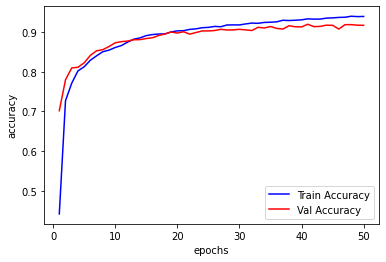

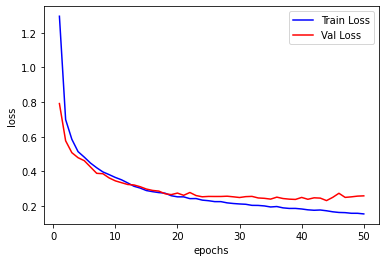

In [112]:
# Evaluation matrix
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Val Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Val Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

predict_x = model.predict(X_test)
y_pred = np.argmax(predict_x,axis=1)

cf = confusion_matrix(y_test, y_pred)
cf

array([[1481,    1,    4,    4,   89],
       [   2, 1528,    2,    1,   33],
       [   7,    3, 1495,    7,   29],
       [  16,    2,    5, 1207,  231],
       [  65,   23,    3,   40, 1143]], dtype=int64)

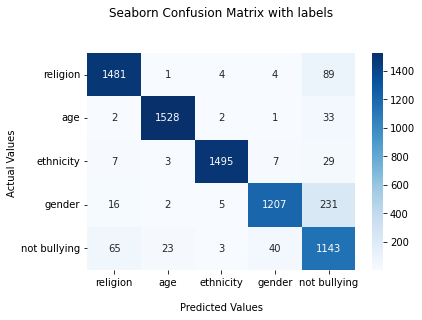

In [59]:
import seaborn as sns
x_axis_labels = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']
y_axis_labels = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']
ax = sns.heatmap(cf, annot=True, cmap='Blues', fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [60]:
# Generate classification report with precision, recall and f1-score
from sklearn.metrics import classification_report

classes_list = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']
print(classification_report(y_test, y_pred, target_names = classes_list))

              precision    recall  f1-score   support

    religion       0.94      0.94      0.94      1579
         age       0.98      0.98      0.98      1566
   ethnicity       0.99      0.97      0.98      1541
      gender       0.96      0.83      0.89      1461
not bullying       0.75      0.90      0.82      1274

    accuracy                           0.92      7421
   macro avg       0.92      0.92      0.92      7421
weighted avg       0.93      0.92      0.93      7421



## Second LSTM Model

Higher dropout for LSTM which mean less memory store, with reduced LSTM units, More layer of dense with tanh activation function, finally one dropout

In [61]:
from keras.layers import Dropout
model2 = Sequential()

#Non-trainable embeddidng layer
model2.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))

#LSTM 
model2.add(LSTM(units=128 , return_sequences = True, dropout = 0.45, activation='tanh', recurrent_activation='sigmoid'))
model2.add(LSTM(units=64, dropout = 0.35, activation='tanh', recurrent_activation='sigmoid'))

# Hidden Layer
model2.add(Dense(units=256 , activation = 'tanh'))
model2.add(Dense(units=128 , activation = 'tanh'))
model2.add(Dense(units=64 , activation = 'tanh'))
model2.add(Dense(units=32 , activation = 'tanh'))
model2.add(Dropout(0.2))
model2.add(Dense(5, activation='softmax'))
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [62]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 100)          1000000   
                                                                 
 lstm_2 (LSTM)               (None, 300, 128)          117248    
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 256)               16640     
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)               

In [63]:
epochs2 = 60
history2 = model2.fit(X_train, y_train, validation_split=0.1, epochs=epochs2, batch_size=128)

Epoch 1/60
209/209 [==============================] - 11s 46ms/step - loss: 0.9341 - accuracy: 0.6283 - val_loss: 0.6464 - val_accuracy: 0.7599
Epoch 2/60
209/209 [==============================] - 9s 43ms/step - loss: 0.6661 - accuracy: 0.7503 - val_loss: 0.5274 - val_accuracy: 0.7939
Epoch 3/60
209/209 [==============================] - 9s 43ms/step - loss: 0.6023 - accuracy: 0.7755 - val_loss: 0.5064 - val_accuracy: 0.8094
Epoch 4/60
209/209 [==============================] - 9s 43ms/step - loss: 0.5590 - accuracy: 0.7902 - val_loss: 0.4758 - val_accuracy: 0.8245
Epoch 5/60
209/209 [==============================] - 9s 44ms/step - loss: 0.5223 - accuracy: 0.8026 - val_loss: 0.4449 - val_accuracy: 0.8282
Epoch 6/60
209/209 [==============================] - 10s 47ms/step - loss: 0.4851 - accuracy: 0.8189 - val_loss: 0.4232 - val_accuracy: 0.8410
Epoch 7/60
209/209 [==============================] - 9s 45ms/step - loss: 0.4591 - accuracy: 0.8270 - val_loss: 0.3809 - val_accuracy: 0.86

Epoch 58/60
209/209 [==============================] - 9s 42ms/step - loss: 0.1987 - accuracy: 0.9277 - val_loss: 0.2526 - val_accuracy: 0.9141
Epoch 59/60
209/209 [==============================] - 9s 43ms/step - loss: 0.2018 - accuracy: 0.9274 - val_loss: 0.2291 - val_accuracy: 0.9205
Epoch 60/60
209/209 [==============================] - 9s 43ms/step - loss: 0.1947 - accuracy: 0.9275 - val_loss: 0.2242 - val_accuracy: 0.9249


In [64]:
print("Accuracy of the model on Training Data is - " , model2.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model2.evaluate(X_test,y_test)[1]*100 , "%")

928/928 [==============================] - 10s 11ms/step - loss: 0.1601 - accuracy: 0.9409
Accuracy of the model on Training Data is -  94.0938651561737 %
232/232 [==============================] - 3s 11ms/step - loss: 0.2042 - accuracy: 0.9287
Accuracy of the model on Testing Data is -  92.87158250808716 %


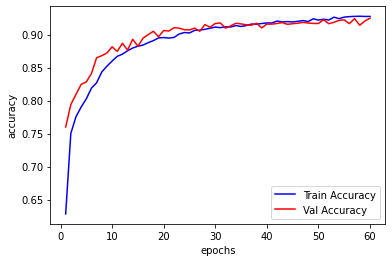

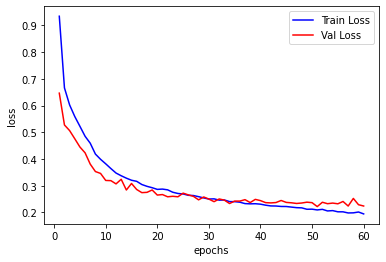

In [120]:
# Evaluation matrix
import matplotlib.pyplot as plt

acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(1, len(acc2)+1)

plt.plot(epochs, acc2, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc2, 'r', label='Val Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss2, 'b', label='Train Loss')
plt.plot(epochs, val_loss2, 'r', label='Val Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [66]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

predict_x2 = model2.predict(X_test)
y_pred2 = np.argmax(predict_x2,axis=1)

cf2 = confusion_matrix(y_test, y_pred2)
cf2

array([[1465,    1,    3,    4,  106],
       [   2, 1530,    0,    0,   34],
       [   2,    1, 1508,    4,   26],
       [   4,    1,    5, 1229,  222],
       [  49,   14,    7,   44, 1160]], dtype=int64)

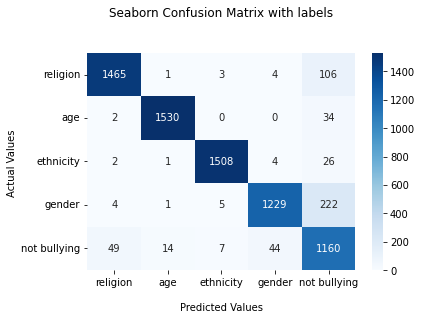

In [67]:
import seaborn as sns
x_axis_labels = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']
y_axis_labels = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']
ax = sns.heatmap(cf2, annot=True, cmap='Blues', fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2, target_names = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']))

              precision    recall  f1-score   support

    religion       0.96      0.93      0.94      1579
         age       0.99      0.98      0.98      1566
   ethnicity       0.99      0.98      0.98      1541
      gender       0.96      0.84      0.90      1461
not bullying       0.75      0.91      0.82      1274

    accuracy                           0.93      7421
   macro avg       0.93      0.93      0.93      7421
weighted avg       0.94      0.93      0.93      7421



# Third LSTM Model

In [69]:
from keras.layers import Dropout
model3 = Sequential()

#Non-trainable embeddidng layer
model3.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))

#LSTM 
model3.add(LSTM(units=512 , return_sequences = True, dropout = 0.20, activation='tanh', recurrent_activation='sigmoid'))
model3.add(LSTM(units=256, dropout = 0.20, activation='tanh', recurrent_activation='sigmoid'))

# Hidden Layer
model3.add(Dense(units=512 , activation = 'tanh'))
model3.add(Dense(units=256 , activation = 'tanh'))
model3.add(Dense(units=128 , activation = 'tanh'))
model3.add(Dropout(0.2))
model3.add(Dense(units=64 , activation = 'tanh'))
model3.add(Dropout(0.2))
model3.add(Dense(units=32 , activation = 'tanh'))
model3.add(Dropout(0.2))
model3.add(Dense(5, activation='softmax'))
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [70]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 100)          1000000   
                                                                 
 lstm_4 (LSTM)               (None, 300, 512)          1255424   
                                                                 
 lstm_5 (LSTM)               (None, 256)               787456    
                                                                 
 dense_9 (Dense)             (None, 512)               131584    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)              

In [71]:
epochs3 = 60
history3 = model3.fit(X_train, y_train, validation_split=0.1, epochs=epochs3, batch_size=128)

Epoch 1/60
209/209 [==============================] - 28s 123ms/step - loss: 0.8769 - accuracy: 0.6554 - val_loss: 0.6491 - val_accuracy: 0.7588
Epoch 2/60
209/209 [==============================] - 25s 122ms/step - loss: 0.6359 - accuracy: 0.7634 - val_loss: 0.5244 - val_accuracy: 0.8070
Epoch 3/60
209/209 [==============================] - 25s 119ms/step - loss: 0.5339 - accuracy: 0.8033 - val_loss: 0.4664 - val_accuracy: 0.8255
Epoch 4/60
209/209 [==============================] - 25s 119ms/step - loss: 0.4573 - accuracy: 0.8323 - val_loss: 0.4286 - val_accuracy: 0.8407
Epoch 5/60
209/209 [==============================] - 25s 118ms/step - loss: 0.3921 - accuracy: 0.8628 - val_loss: 0.3769 - val_accuracy: 0.8636
Epoch 6/60
209/209 [==============================] - 25s 119ms/step - loss: 0.3616 - accuracy: 0.8713 - val_loss: 0.3431 - val_accuracy: 0.8794
Epoch 7/60
209/209 [==============================] - 25s 119ms/step - loss: 0.3426 - accuracy: 0.8811 - val_loss: 0.3486 - val_ac

In [72]:
print("Accuracy of the model on Training Data is - " , model3.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model3.evaluate(X_test,y_test)[1]*100 , "%")

928/928 [==============================] - 29s 31ms/step - loss: 0.0695 - accuracy: 0.9802
Accuracy of the model on Training Data is -  98.0189323425293 %
232/232 [==============================] - 7s 32ms/step - loss: 0.3753 - accuracy: 0.9167
Accuracy of the model on Testing Data is -  91.672283411026 %


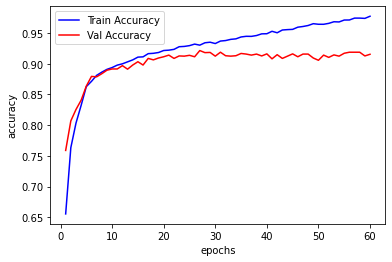

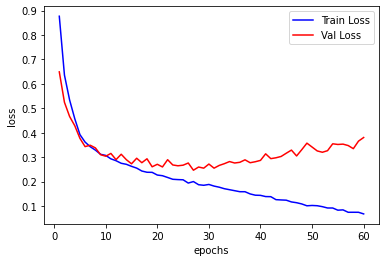

In [119]:
# Evaluation matrix
import matplotlib.pyplot as plt

acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs = range(1, len(acc3)+1)

plt.plot(epochs, acc3, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc3, 'r', label='Val Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss3, 'b', label='Train Loss')
plt.plot(epochs, val_loss3, 'r', label='Val Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [74]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

predict_x3 = model3.predict(X_test)
y_pred3 = np.argmax(predict_x3,axis=1)

cf3 = confusion_matrix(y_test, y_pred3)
cf3

array([[1414,    0,    9,   18,  138],
       [   2, 1521,    6,    1,   36],
       [   4,    0, 1502,    9,   26],
       [   2,    0,    3, 1233,  223],
       [  40,   20,    5,   76, 1133]], dtype=int64)

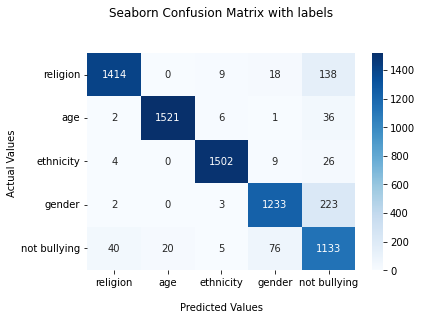

In [75]:
import seaborn as sns
x_axis_labels = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']
y_axis_labels = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']
ax = sns.heatmap(cf3, annot=True, cmap='Blues', fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred3, target_names = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']))

              precision    recall  f1-score   support

    religion       0.97      0.90      0.93      1579
         age       0.99      0.97      0.98      1566
   ethnicity       0.98      0.97      0.98      1541
      gender       0.92      0.84      0.88      1461
not bullying       0.73      0.89      0.80      1274

    accuracy                           0.92      7421
   macro avg       0.92      0.91      0.91      7421
weighted avg       0.93      0.92      0.92      7421



## Fourth LSTM model 

Same as third but with Early Stopping 0.0001 adam learning rate and 200 epochs

In [77]:
from keras.layers import Dropout
model4 = Sequential()

#Non-trainable embeddidng layer
model4.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))

#LSTM 
model4.add(LSTM(units=512 , return_sequences = True, dropout = 0.20, activation='tanh', recurrent_activation='sigmoid'))
model4.add(LSTM(units=256, dropout = 0.20, activation='tanh', recurrent_activation='sigmoid'))

# Hidden Layer
model4.add(Dense(units=512 , activation = 'tanh'))
model4.add(Dense(units=256 , activation = 'tanh'))
model4.add(Dense(units=128 , activation = 'tanh'))
model4.add(Dropout(0.2))
model4.add(Dense(units=64 , activation = 'tanh'))
model4.add(Dropout(0.2))
model4.add(Dense(units=32 , activation = 'tanh'))
model4.add(Dropout(0.2))
model4.add(Dense(5, activation='softmax'))


In [82]:
from tensorflow.keras import callbacks
from tensorflow import keras

# Customer optimizer
adam_custom_lr = keras.optimizers.Adam(learning_rate=0.0001)

# Early Stopping Patient 15
early_stopping = callbacks.EarlyStopping(monitor ="val_accuracy", 
                                        patience = 20, 
                                        restore_best_weights = True)


model4.compile(loss='sparse_categorical_crossentropy', optimizer=adam_custom_lr, metrics=['accuracy'])

In [84]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 100)          1000000   
                                                                 
 lstm_6 (LSTM)               (None, 300, 512)          1255424   
                                                                 
 lstm_7 (LSTM)               (None, 256)               787456    
                                                                 
 dense_15 (Dense)            (None, 512)               131584    
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)              

In [85]:
epochs4 = 200
history4 = model4.fit(X_train, y_train, validation_split=0.1, epochs=epochs4, batch_size=128,  callbacks=[early_stopping])

Epoch 1/200
209/209 [==============================] - 28s 124ms/step - loss: 1.1396 - accuracy: 0.5452 - val_loss: 0.7087 - val_accuracy: 0.7369
Epoch 2/200
209/209 [==============================] - 25s 119ms/step - loss: 0.7432 - accuracy: 0.7244 - val_loss: 0.6015 - val_accuracy: 0.7787
Epoch 3/200
209/209 [==============================] - 25s 119ms/step - loss: 0.6791 - accuracy: 0.7493 - val_loss: 0.5677 - val_accuracy: 0.7875
Epoch 4/200
209/209 [==============================] - 25s 119ms/step - loss: 0.6471 - accuracy: 0.7615 - val_loss: 0.5812 - val_accuracy: 0.7868
Epoch 5/200
209/209 [==============================] - 25s 119ms/step - loss: 0.6210 - accuracy: 0.7710 - val_loss: 0.5134 - val_accuracy: 0.8178
Epoch 6/200
209/209 [==============================] - 25s 120ms/step - loss: 0.6072 - accuracy: 0.7793 - val_loss: 0.5181 - val_accuracy: 0.8158
Epoch 7/200
209/209 [==============================] - 25s 117ms/step - loss: 0.5930 - accuracy: 0.7867 - val_loss: 0.5115 -

Epoch 57/200
209/209 [==============================] - 25s 120ms/step - loss: 0.2709 - accuracy: 0.9012 - val_loss: 0.2760 - val_accuracy: 0.9003
Epoch 58/200
209/209 [==============================] - 25s 121ms/step - loss: 0.2673 - accuracy: 0.9021 - val_loss: 0.2763 - val_accuracy: 0.9000
Epoch 59/200
209/209 [==============================] - 25s 119ms/step - loss: 0.2641 - accuracy: 0.9035 - val_loss: 0.2818 - val_accuracy: 0.8956
Epoch 60/200
209/209 [==============================] - 25s 118ms/step - loss: 0.2610 - accuracy: 0.9047 - val_loss: 0.2849 - val_accuracy: 0.8963
Epoch 61/200
209/209 [==============================] - 25s 118ms/step - loss: 0.2549 - accuracy: 0.9067 - val_loss: 0.2697 - val_accuracy: 0.9020
Epoch 62/200
209/209 [==============================] - 25s 119ms/step - loss: 0.2587 - accuracy: 0.9049 - val_loss: 0.2731 - val_accuracy: 0.8986
Epoch 63/200
209/209 [==============================] - 25s 118ms/step - loss: 0.2568 - accuracy: 0.9051 - val_loss: 0

In [86]:
print("Accuracy of the model on Training Data is - " , model4.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model4.evaluate(X_test,y_test)[1]*100 , "%")

928/928 [==============================] - 28s 30ms/step - loss: 0.1737 - accuracy: 0.9361
Accuracy of the model on Training Data is -  93.60533952713013 %
232/232 [==============================] - 7s 30ms/step - loss: 0.2342 - accuracy: 0.9229
Accuracy of the model on Testing Data is -  92.29214191436768 %


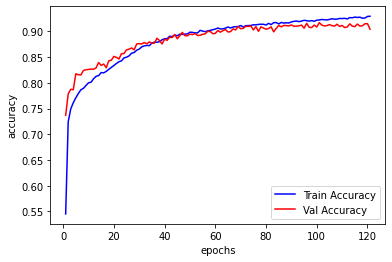

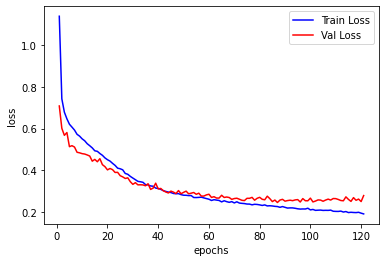

In [118]:
# Evaluation matrix
import matplotlib.pyplot as plt

acc4 = history4.history['accuracy']
val_acc4 = history4.history['val_accuracy']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(1, len(acc4)+1)

plt.plot(epochs, acc4, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc4, 'r', label='Val Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss4, 'b', label='Train Loss')
plt.plot(epochs, val_loss4, 'r', label='Val Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [88]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

predict_x4 = model4.predict(X_test)
y_pred4 = np.argmax(predict_x4,axis=1)

cf4 = confusion_matrix(y_test, y_pred4)
cf4

array([[1442,    1,   11,    9,  116],
       [   2, 1520,    8,    2,   34],
       [   5,    1, 1493,    9,   33],
       [   3,    2,   10, 1237,  209],
       [  43,   16,    6,   52, 1157]], dtype=int64)

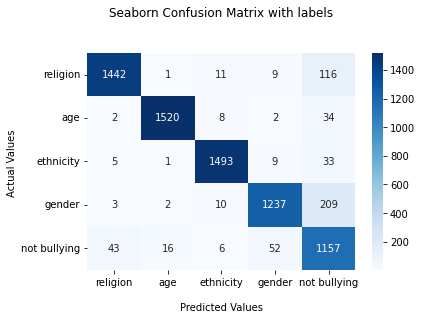

In [89]:
import seaborn as sns
x_axis_labels = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']
y_axis_labels = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']
ax = sns.heatmap(cf4, annot=True, cmap='Blues', fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred4, target_names = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']))

              precision    recall  f1-score   support

    religion       0.96      0.91      0.94      1579
         age       0.99      0.97      0.98      1566
   ethnicity       0.98      0.97      0.97      1541
      gender       0.94      0.85      0.89      1461
not bullying       0.75      0.91      0.82      1274

    accuracy                           0.92      7421
   macro avg       0.92      0.92      0.92      7421
weighted avg       0.93      0.92      0.92      7421



# The Fifth LSTM Tuning

In [105]:
from keras.layers import Dropout, BatchNormalization
model7 = Sequential()

#Non-trainable embeddidng layer
model7.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))

#LSTM 
model7.add(LSTM(units=512 , return_sequences = True, dropout = 0.40, activation='tanh', recurrent_activation='sigmoid'))
model7.add(LSTM(units=256, dropout = 0.40, activation='tanh', recurrent_activation='sigmoid'))
model7.add(BatchNormalization(momentum=0.95, epsilon=0.005))

# Hidden Layer
model7.add(Dense(units=512 , activation = 'tanh'))
model7.add(BatchNormalization(momentum=0.95, epsilon=0.005))
model7.add(Dense(units=256 , activation = 'tanh'))
model7.add(Dropout(0.5))
model7.add(Dense(units=128 , activation = 'tanh'))
model7.add(BatchNormalization(momentum=0.95, epsilon=0.005))
model7.add(Dense(units=64 , activation = 'tanh'))
model7.add(Dropout(0.5))
model7.add(Dense(units=32 , activation = 'tanh'))
model7.add(Dropout(0.5))
model7.add(Dense(5, activation='softmax'))

In [106]:
from tensorflow.keras import callbacks
from tensorflow import keras

# Customer optimizer
adam_custom_lr = keras.optimizers.Adam(learning_rate=0.0001)

# Early Stopping Patient 25
early_stopping = callbacks.EarlyStopping(monitor ="val_accuracy", 
                                        patience = 25, 
                                        restore_best_weights = True)


model7.compile(loss='sparse_categorical_crossentropy', optimizer=adam_custom_lr, metrics=['accuracy'])

In [107]:
model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 300, 100)          1000000   
                                                                 
 lstm_11 (LSTM)              (None, 300, 512)          1255424   
                                                                 
 lstm_12 (LSTM)              (None, 256)               787456    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_32 (Dense)            (None, 512)               131584    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                      

In [109]:
epochs7 = 230
history7 = model7.fit(X_train, y_train, validation_split=0.15, epochs=epochs7, batch_size=128,  callbacks=[early_stopping])

Epoch 1/230
198/198 [==============================] - 28s 127ms/step - loss: 1.4334 - accuracy: 0.4539 - val_loss: 0.7469 - val_accuracy: 0.7375
Epoch 2/230
198/198 [==============================] - 24s 122ms/step - loss: 1.1469 - accuracy: 0.5882 - val_loss: 0.7379 - val_accuracy: 0.7379
Epoch 3/230
198/198 [==============================] - 24s 124ms/step - loss: 1.0752 - accuracy: 0.6207 - val_loss: 0.6849 - val_accuracy: 0.7521
Epoch 4/230
198/198 [==============================] - 24s 123ms/step - loss: 1.0281 - accuracy: 0.6398 - val_loss: 0.6279 - val_accuracy: 0.7804
Epoch 5/230
198/198 [==============================] - 24s 123ms/step - loss: 0.9977 - accuracy: 0.6517 - val_loss: 0.6793 - val_accuracy: 0.7572
Epoch 6/230
198/198 [==============================] - 25s 124ms/step - loss: 0.9765 - accuracy: 0.6578 - val_loss: 0.7171 - val_accuracy: 0.7519
Epoch 7/230
198/198 [==============================] - 25s 124ms/step - loss: 0.9443 - accuracy: 0.6712 - val_loss: 0.5995 -

Epoch 57/230
198/198 [==============================] - 24s 123ms/step - loss: 0.4384 - accuracy: 0.8497 - val_loss: 0.3874 - val_accuracy: 0.8648
Epoch 58/230
198/198 [==============================] - 24s 123ms/step - loss: 0.4302 - accuracy: 0.8557 - val_loss: 0.4992 - val_accuracy: 0.8159
Epoch 59/230
198/198 [==============================] - 24s 123ms/step - loss: 0.4373 - accuracy: 0.8535 - val_loss: 0.3355 - val_accuracy: 0.8852
Epoch 60/230
198/198 [==============================] - 24s 123ms/step - loss: 0.4207 - accuracy: 0.8567 - val_loss: 0.4867 - val_accuracy: 0.8313
Epoch 61/230
198/198 [==============================] - 24s 123ms/step - loss: 0.4314 - accuracy: 0.8537 - val_loss: 0.4024 - val_accuracy: 0.8590
Epoch 62/230
198/198 [==============================] - 24s 123ms/step - loss: 0.4334 - accuracy: 0.8541 - val_loss: 0.4490 - val_accuracy: 0.8421
Epoch 63/230
198/198 [==============================] - 24s 123ms/step - loss: 0.4175 - accuracy: 0.8589 - val_loss: 0

In [113]:
print("Accuracy of the model on Training Data is - " , model7.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model7.evaluate(X_test,y_test)[1]*100 , "%")

928/928 [==============================] - 29s 31ms/step - loss: 0.2468 - accuracy: 0.9147
Accuracy of the model on Training Data is -  91.46592020988464 %
232/232 [==============================] - 7s 31ms/step - loss: 0.2659 - accuracy: 0.9112
Accuracy of the model on Testing Data is -  91.11979603767395 %


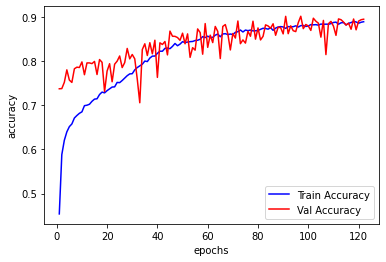

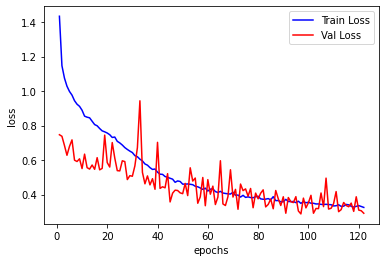

In [117]:
# Evaluation matrix
import matplotlib.pyplot as plt

acc7 = history7.history['accuracy']
val_acc7 = history7.history['val_accuracy']
loss7 = history7.history['loss']
val_loss7 = history7.history['val_loss']

epochs = range(1, len(acc7)+1)

plt.plot(epochs, acc7, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc7, 'r', label='Val Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss7, 'b', label='Train Loss')
plt.plot(epochs, val_loss7, 'r', label='Val Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [115]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

predict_x7 = model7.predict(X_test)
y_pred7 = np.argmax(predict_x7,axis=1)

cf7 = confusion_matrix(y_test, y_pred7)
cf7

array([[1424,    2,    3,   11,  139],
       [   2, 1534,    3,    1,   26],
       [   7,    4, 1470,   13,   47],
       [   3,    2,    2, 1204,  250],
       [  40,   21,    1,   82, 1130]], dtype=int64)

In [116]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred7, target_names = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']))

              precision    recall  f1-score   support

    religion       0.96      0.90      0.93      1579
         age       0.98      0.98      0.98      1566
   ethnicity       0.99      0.95      0.97      1541
      gender       0.92      0.82      0.87      1461
not bullying       0.71      0.89      0.79      1274

    accuracy                           0.91      7421
   macro avg       0.91      0.91      0.91      7421
weighted avg       0.92      0.91      0.91      7421



## Building BLSTM Model

In [91]:
from keras.models import Sequential
from keras.layers import Dense, Bidirectional, LSTM

In [92]:
model5 = Sequential()

#Non-trainable embeddidng layer
model5.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))

#BLSTM
model5.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(5, 10)))
model5.add(Bidirectional(LSTM(10)))

#Hidden Layer
model5.add(Dense(256, activation='relu'))
model5.add(Dense(128, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(32, activation='relu'))
model5.add(Dropout(0.3))

model5.add(Dense(6, activation='softmax'))

In [93]:
model5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [94]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 300, 100)          1000000   
                                                                 
 bidirectional (Bidirectiona  (None, 300, 128)         84480     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 20)               11120     
 nal)                                                            
                                                                 
 dense_21 (Dense)            (None, 256)               5376      
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 64)               

In [95]:
epochs5 = 60
history5 = model5.fit(X_train, y_train, validation_split=0.1, epochs=epochs5, batch_size=128)

Epoch 1/60
209/209 [==============================] - 15s 60ms/step - loss: 1.3609 - accuracy: 0.3915 - val_loss: 0.9034 - val_accuracy: 0.6484
Epoch 2/60
209/209 [==============================] - 12s 57ms/step - loss: 0.8159 - accuracy: 0.6931 - val_loss: 0.6558 - val_accuracy: 0.7508
Epoch 3/60
209/209 [==============================] - 12s 57ms/step - loss: 0.6295 - accuracy: 0.7711 - val_loss: 0.5623 - val_accuracy: 0.7881
Epoch 4/60
209/209 [==============================] - 12s 57ms/step - loss: 0.5457 - accuracy: 0.8023 - val_loss: 0.4959 - val_accuracy: 0.8201
Epoch 5/60
209/209 [==============================] - 12s 56ms/step - loss: 0.4884 - accuracy: 0.8302 - val_loss: 0.5003 - val_accuracy: 0.8212
Epoch 6/60
209/209 [==============================] - 12s 57ms/step - loss: 0.4619 - accuracy: 0.8415 - val_loss: 0.4439 - val_accuracy: 0.8390
Epoch 7/60
209/209 [==============================] - 12s 57ms/step - loss: 0.4277 - accuracy: 0.8537 - val_loss: 0.4332 - val_accuracy:

In [96]:
print("Accuracy of the model on Training Data is - " , model5.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model5.evaluate(X_test,y_test)[1]*100 , "%")

928/928 [==============================] - 19s 21ms/step - loss: 0.1414 - accuracy: 0.9531
Accuracy of the model on Training Data is -  95.31350135803223 %
232/232 [==============================] - 5s 21ms/step - loss: 0.3180 - accuracy: 0.9189
Accuracy of the model on Testing Data is -  91.88788533210754 %


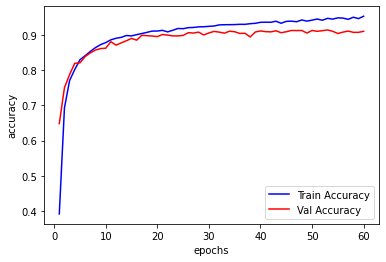

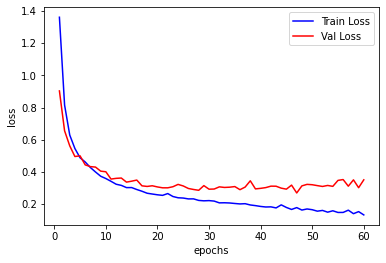

In [121]:
# Evaluation matrix
import matplotlib.pyplot as plt

acc5 = history5.history['accuracy']
val_acc5 = history5.history['val_accuracy']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']

epochs = range(1, len(acc5)+1)

plt.plot(epochs, acc5, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc5, 'r', label='Val Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss5, 'b', label='Train Loss')
plt.plot(epochs, val_loss5, 'r', label='Val Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [98]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

predict_x5 = model5.predict(X_test)
y_pred5 = np.argmax(predict_x5,axis=1)

cf5 = confusion_matrix(y_test, y_pred5)
cf5

array([[1478,    2,    8,   11,   80],
       [   2, 1529,    6,    1,   28],
       [   8,    4, 1498,    8,   23],
       [   9,    4,    7, 1224,  217],
       [  81,   22,   12,   69, 1090]], dtype=int64)

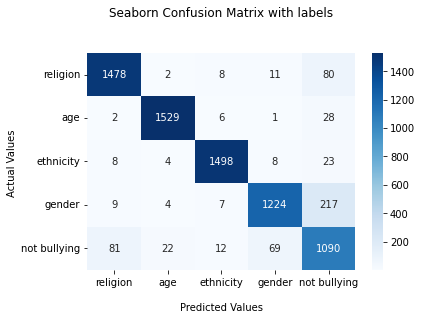

In [99]:
import seaborn as sns
x_axis_labels = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']
y_axis_labels = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']
ax = sns.heatmap(cf5, annot=True, cmap='Blues', fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [100]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred5, target_names = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']))

              precision    recall  f1-score   support

    religion       0.94      0.94      0.94      1579
         age       0.98      0.98      0.98      1566
   ethnicity       0.98      0.97      0.98      1541
      gender       0.93      0.84      0.88      1461
not bullying       0.76      0.86      0.80      1274

    accuracy                           0.92      7421
   macro avg       0.92      0.92      0.92      7421
weighted avg       0.92      0.92      0.92      7421



## Second BLSTM Model

Lower batch size =32, early stopping patience 30, total epochs 250, larger unit of BiLSTM, more deep learning layer, with more dropout, adma learnign rate 0.0001

In [54]:
from keras.layers import Dropout, BatchNormalization
model6 = Sequential()

#Non-trainable embeddidng layer
model6.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))

#BLSTM
model6.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=(5, 10)))
model6.add(Bidirectional(LSTM(128)))
model6.add(BatchNormalization())

#Hidden Layer
model6.add(Dense(512, activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(256, activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(128, activation='relu'))
model6.add(Dropout(0.3))
model6.add(Dense(64, activation='relu'))
model6.add(Dropout(0.3))
model6.add(Dense(32, activation='relu'))
model6.add(Dropout(0.3))

model6.add(Dense(6, activation='softmax'))

In [56]:
from tensorflow.keras import callbacks
from tensorflow import keras

# Customer optimizer
adam_custom_lr = keras.optimizers.Adam(learning_rate=0.0001)

# Early Stopping Patient 25
early_stopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        patience = 25, 
                                        restore_best_weights = True)


model6.compile(loss='sparse_categorical_crossentropy', optimizer=adam_custom_lr, metrics=['accuracy'])

In [57]:
model6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 100)          1000000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 300, 512)         731136    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              656384    
 nal)                                                            
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 512)               131584    
                                                      

In [58]:
epochs6 = 250
history6 = model6.fit(X_train, y_train, validation_split=0.15, epochs=epochs6, batch_size=32,  callbacks=[early_stopping])

Epoch 1/250
789/789 [==============================] - 69s 81ms/step - loss: 1.1442 - accuracy: 0.5476 - val_loss: 8.2433 - val_accuracy: 0.2163
Epoch 2/250
789/789 [==============================] - 63s 80ms/step - loss: 0.7346 - accuracy: 0.7595 - val_loss: 2.0213 - val_accuracy: 0.4851
Epoch 3/250
789/789 [==============================] - 64s 81ms/step - loss: 0.6624 - accuracy: 0.7853 - val_loss: 1.0876 - val_accuracy: 0.6418
Epoch 4/250
789/789 [==============================] - 64s 81ms/step - loss: 0.6305 - accuracy: 0.7936 - val_loss: 0.6558 - val_accuracy: 0.7638
Epoch 5/250
789/789 [==============================] - 66s 84ms/step - loss: 0.6036 - accuracy: 0.8002 - val_loss: 0.6650 - val_accuracy: 0.7635
Epoch 6/250
789/789 [==============================] - 69s 87ms/step - loss: 0.5845 - accuracy: 0.8059 - val_loss: 0.7378 - val_accuracy: 0.7411
Epoch 7/250
789/789 [==============================] - 69s 87ms/step - loss: 0.5609 - accuracy: 0.8110 - val_loss: 0.9061 - val_ac

789/789 [==============================] - 63s 80ms/step - loss: 0.1972 - accuracy: 0.9334 - val_loss: 0.5763 - val_accuracy: 0.8433
Epoch 58/250
789/789 [==============================] - 63s 80ms/step - loss: 0.2045 - accuracy: 0.9302 - val_loss: 0.5240 - val_accuracy: 0.8601
Epoch 59/250
789/789 [==============================] - 63s 80ms/step - loss: 0.1910 - accuracy: 0.9338 - val_loss: 0.4632 - val_accuracy: 0.8628
Epoch 60/250
789/789 [==============================] - 63s 80ms/step - loss: 0.1963 - accuracy: 0.9329 - val_loss: 0.4385 - val_accuracy: 0.8693
Epoch 61/250
789/789 [==============================] - 63s 80ms/step - loss: 0.1891 - accuracy: 0.9350 - val_loss: 0.6494 - val_accuracy: 0.8408
Epoch 62/250
789/789 [==============================] - 62s 79ms/step - loss: 0.1804 - accuracy: 0.9362 - val_loss: 1.8439 - val_accuracy: 0.6735
Epoch 63/250
789/789 [==============================] - 63s 80ms/step - loss: 0.1790 - accuracy: 0.9374 - val_loss: 0.5843 - val_accuracy

In [59]:
print("Accuracy of the model on Training Data is - " , model6.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model6.evaluate(X_test,y_test)[1]*100 , "%")

928/928 [==============================] - 29s 31ms/step - loss: 0.2718 - accuracy: 0.8956
Accuracy of the model on Training Data is -  89.56234455108643 %
232/232 [==============================] - 7s 31ms/step - loss: 0.3602 - accuracy: 0.8688
Accuracy of the model on Testing Data is -  86.87508702278137 %


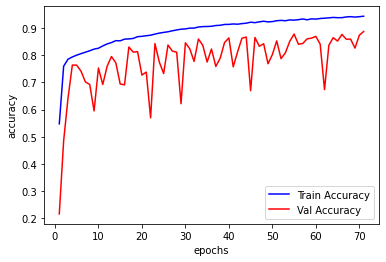

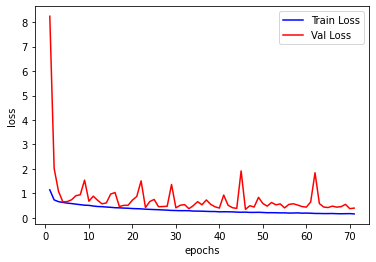

In [61]:
# Evaluation matrix
import matplotlib.pyplot as plt

acc6 = history6.history['accuracy']
val_acc6 = history6.history['val_accuracy']
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']

epochs = range(1, len(acc6)+1)

plt.plot(epochs, acc6, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc6, 'r', label='Val Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss6, 'b', label='Train Loss')
plt.plot(epochs, val_loss6, 'r', label='Val Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

predict_x6 = model6.predict(X_test)
y_pred6 = np.argmax(predict_x6,axis=1)

cf6 = confusion_matrix(y_test, y_pred6)
cf6

array([[1437,    2,   37,   33,   70],
       [  13, 1516,   11,    8,   18],
       [  24,    3, 1468,   29,   17],
       [  42,    4,   36, 1188,  191],
       [ 131,   43,   77,  185,  838]], dtype=int64)

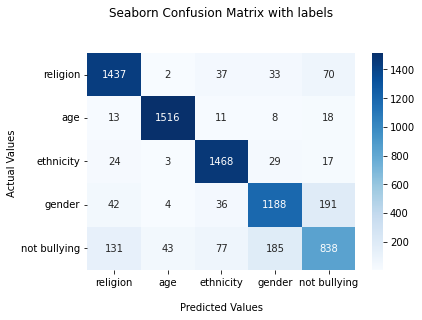

In [63]:
import seaborn as sns
x_axis_labels = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']
y_axis_labels = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']
ax = sns.heatmap(cf6, annot=True, cmap='Blues', fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred6, target_names = ['religion', 'age', 'ethnicity', 'gender', 'not bullying']))

              precision    recall  f1-score   support

    religion       0.87      0.91      0.89      1579
         age       0.97      0.97      0.97      1566
   ethnicity       0.90      0.95      0.93      1541
      gender       0.82      0.81      0.82      1461
not bullying       0.74      0.66      0.70      1274

    accuracy                           0.87      7421
   macro avg       0.86      0.86      0.86      7421
weighted avg       0.87      0.87      0.87      7421

